In [3]:
# Lets analyze wines data set using agglomerative clustering 
# this data is about red wines. The input objective tests and output is based on sensort data (median of at least 3 evaluations made by wine experts)
# each expert graded the wine quality between 0 to 10.

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
wine_data_attr = pd.read_csv("./Downloads/winequality-red.csv")
wine_data_attr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


C:\Users\shyam\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


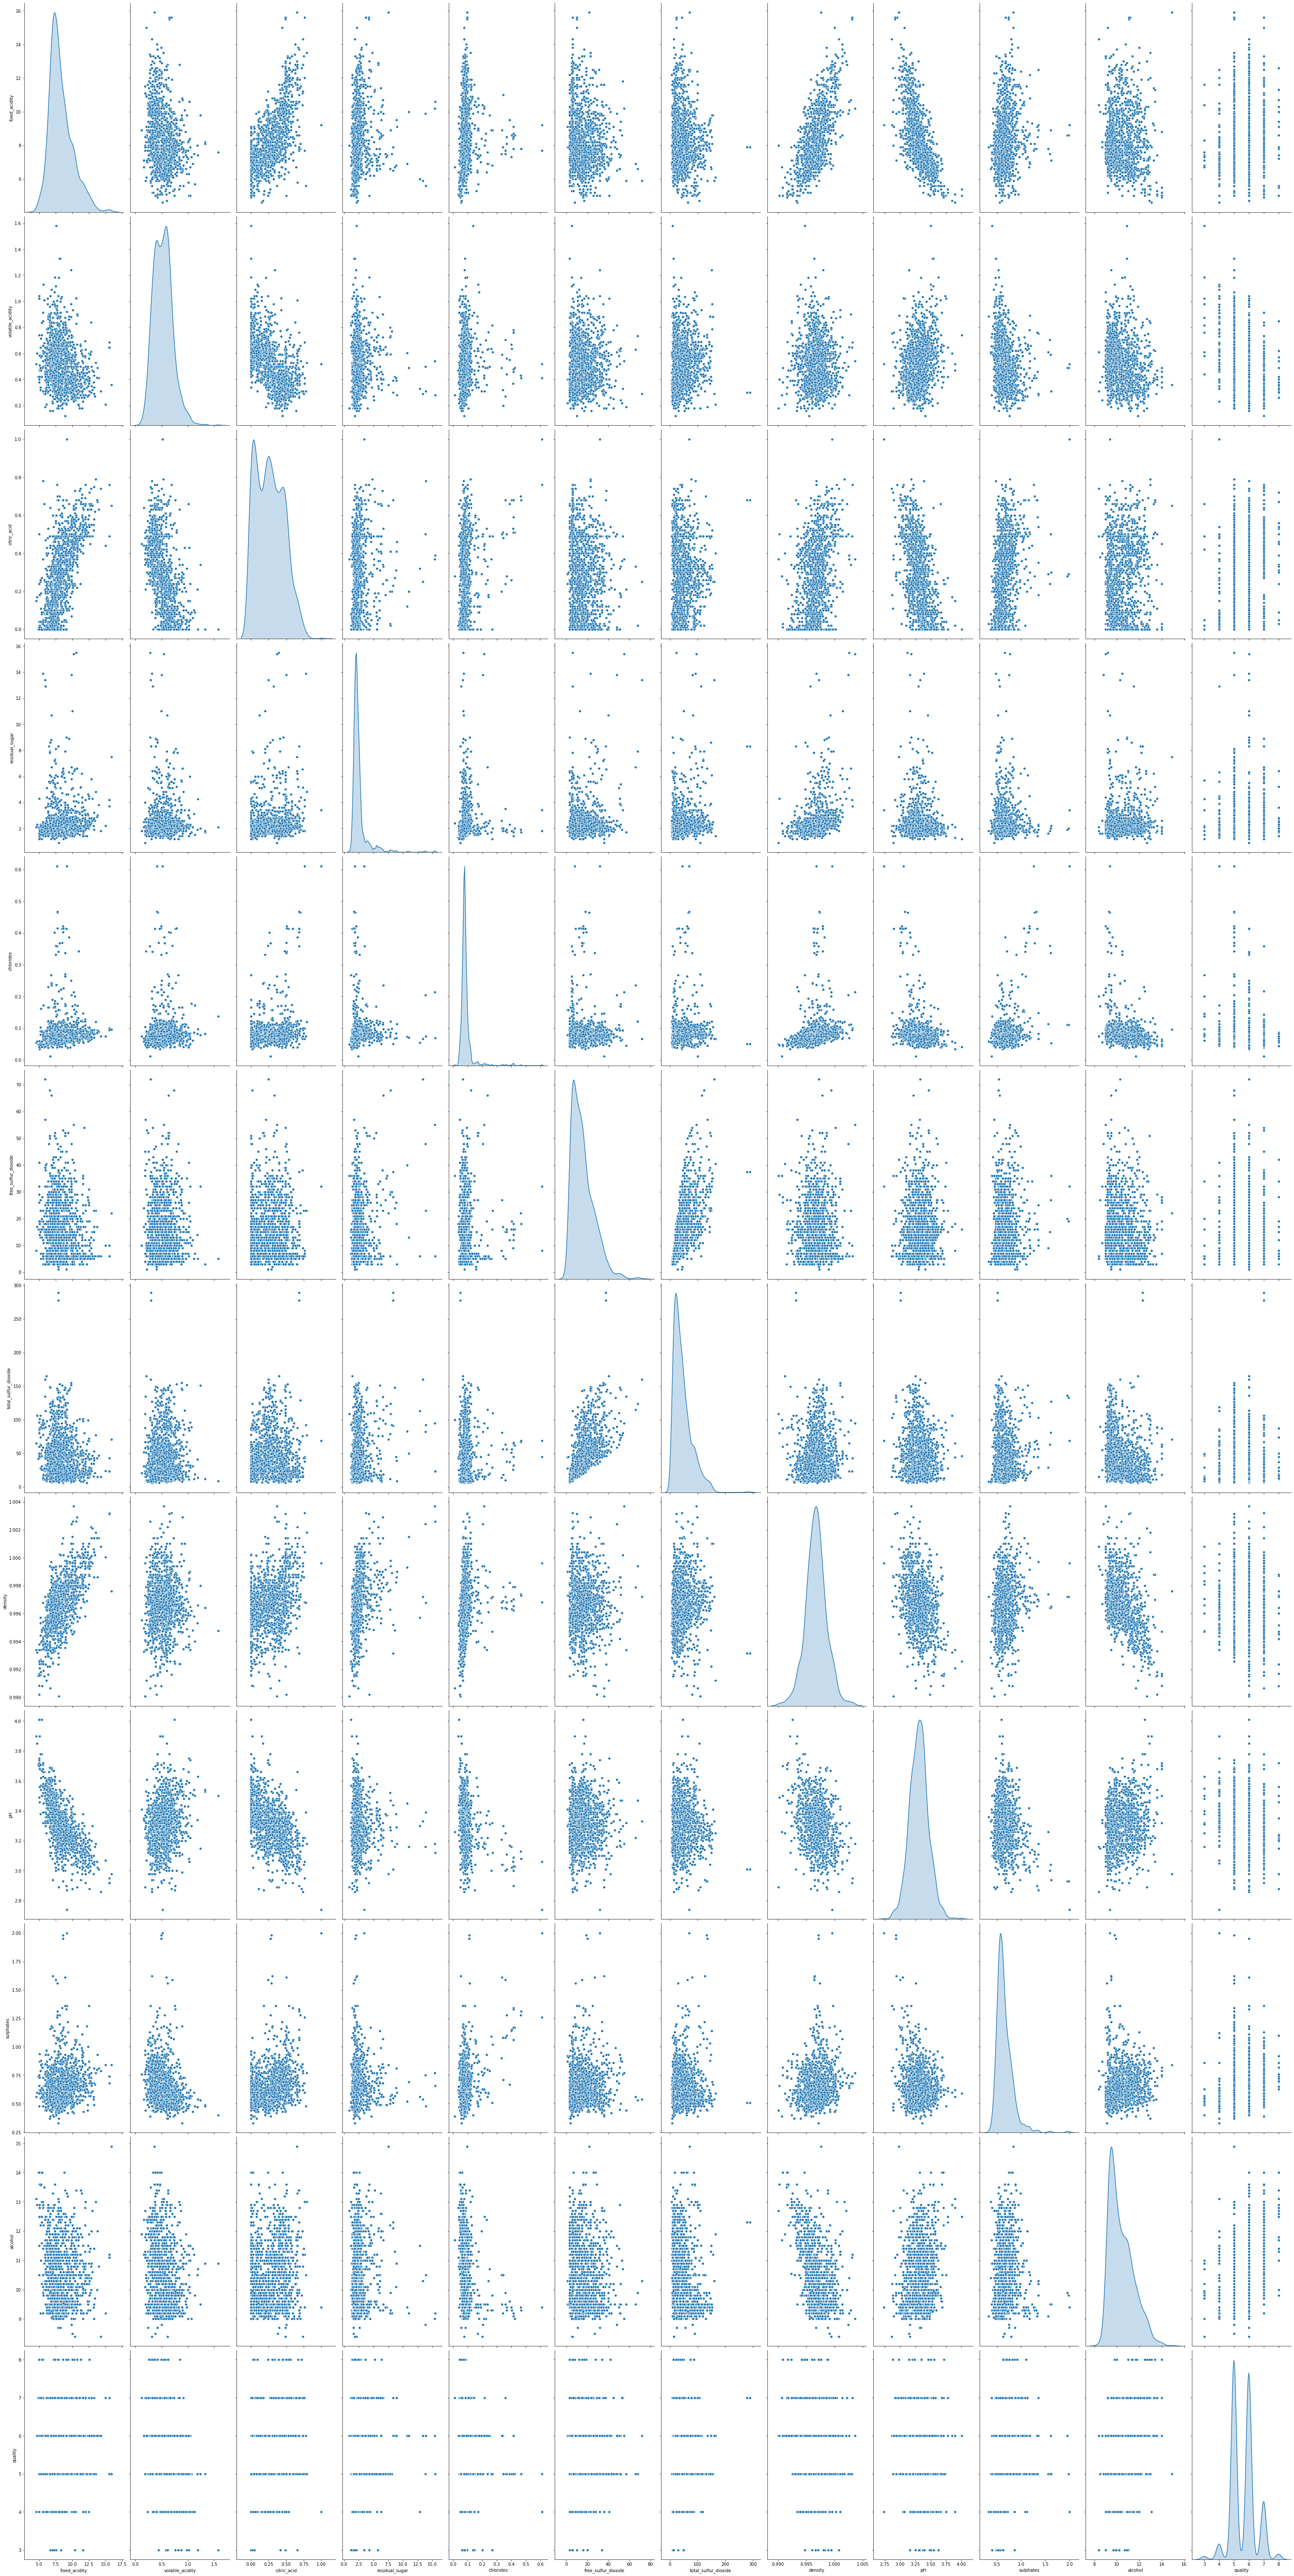

In [10]:
sns.pairplot(wine_data_attr,size=7,aspect=0.5,diag_kind='kde')

Based on kde analysis , it looks like high level 3 cluster should be present.

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
# number os cluster is given some random number as first itration. Actula cluster can be decided based on dendrogram

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',linkage='average')
model.fit(wine_data_attr)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [15]:
wine_data_attr['labels']=model.labels_
wine_data_attr.groupby(['labels']).count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
labels,,,,,,,,,,,,
0,65,65,65,65,65,65,65,65,65,65,65,65
1,2,2,2,2,2,2,2,2,2,2,2,2
2,589,589,589,589,589,589,589,589,589,589,589,589
3,2,2,2,2,2,2,2,2,2,2,2,2
4,185,185,185,185,185,185,185,185,185,185,185,185
5,756,756,756,756,756,756,756,756,756,756,756,756


In [17]:
wine_clusters = wine_data_attr.groupby(['labels'])
wine_clusters

In [18]:
wine_groups = wine_clusters.head(1599) # This create a panda DF groupby object
wine_groups

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,labels
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2


In [19]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist # pairwise distribution between Data points

In [30]:
#Cophenet Index is measure of the co-relation between the distance of points in feature space and distance in dendrogram
# CLoser it is to 1 , the better the clustering is

z = linkage(wine_data_attr,'average')
c,coph_dists = cophenet(z,pdist(wine_data_attr))
c

0.8333815767944764

It means 83% distance of original data points has been maintained in Dendrogram using Avg distance mechanism

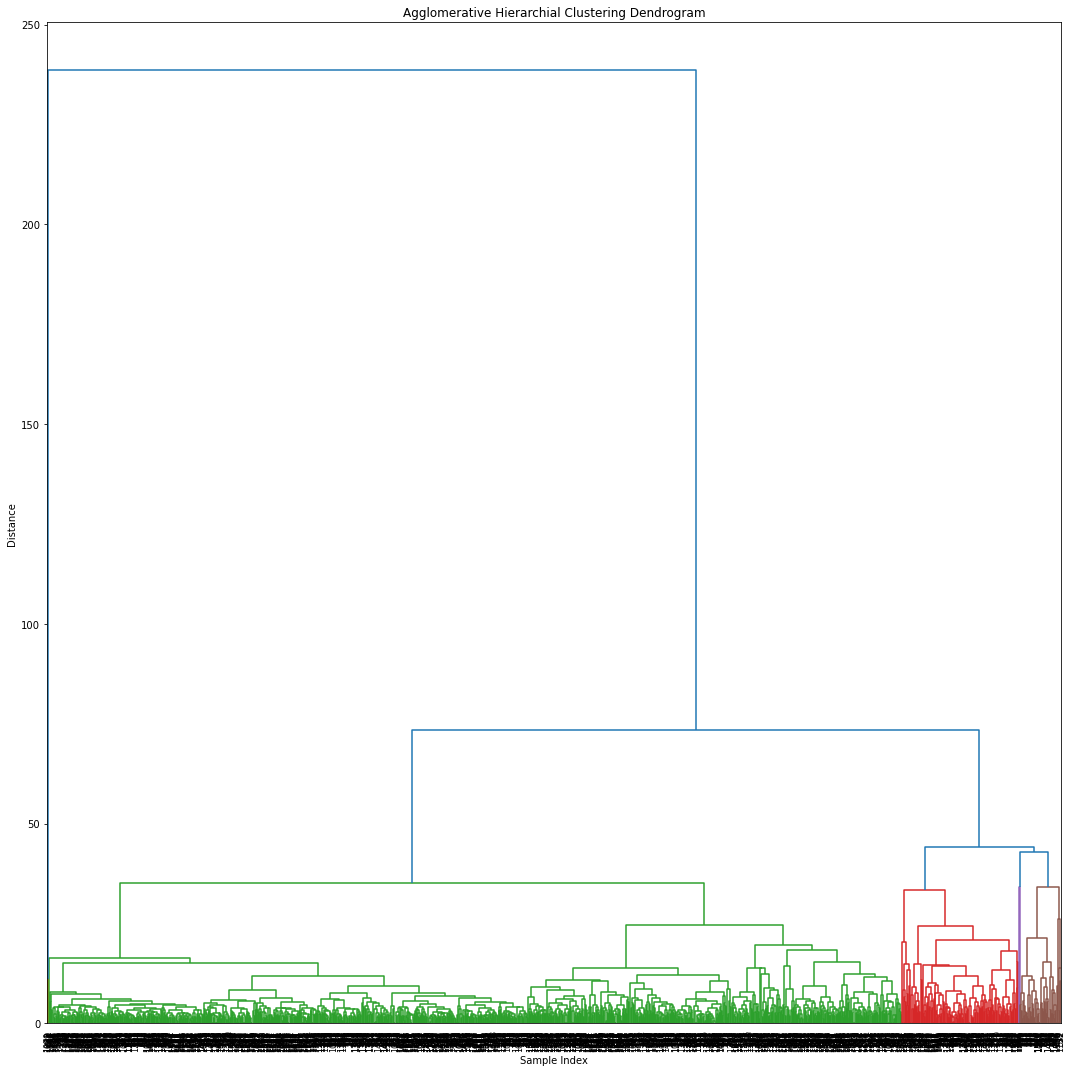

In [31]:
plt.figure(figsize=(15,15))
plt.title("Agglomerative Hierarchial Clustering Dendrogram")
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(z,leaf_rotation=90,color_threshold=40,leaf_font_size=8.)
plt.tight_layout()

#### Observation :
    
at Dendogramic distance of 40 , its giving 4 clusters
But one cluster is very large and other 3 are pretty small clusters.

to make balanced clusters , we have given low threshold but that will make cluster un-interpretable becoz there wont be much difference between the clusters 

May be the linkage method that we used is not right.


In [23]:
z = linkage(wine_data_attr,'complete')
c,coph_dists = cophenet(z,pdist(wine_data_attr))
c

0.8387870482249878

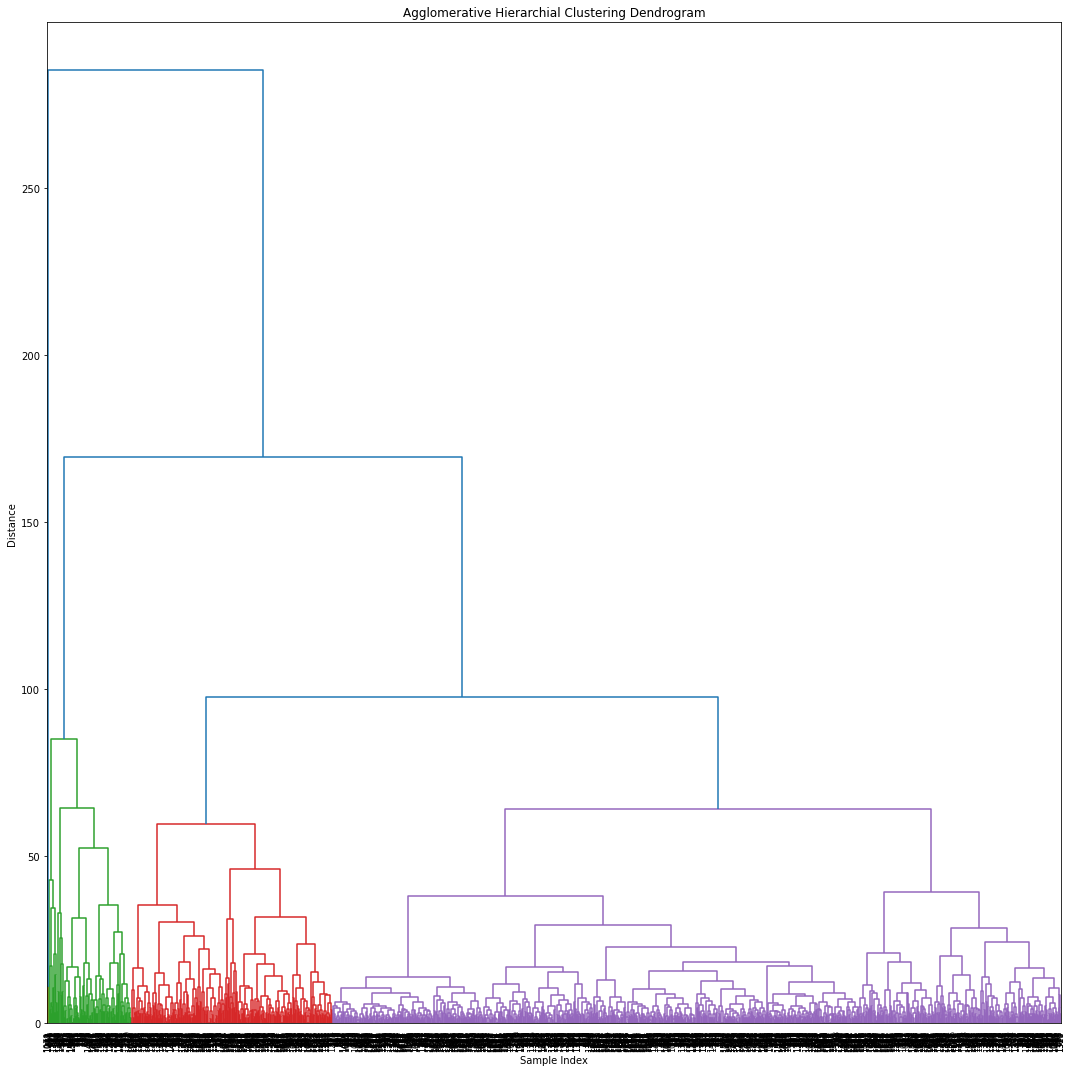

In [25]:
plt.figure(figsize=(15,15))
plt.title("Agglomerative Hierarchial Clustering Dendrogram")
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(z,leaf_rotation=90,color_threshold=90,leaf_font_size=8.)
plt.tight_layout()

#### Observation :
    
    Problem remain same as average linkage method

In [26]:
z = linkage(wine_data_attr,'ward')
c,coph_dists = cophenet(z,pdist(wine_data_attr))
c

0.6688164031714893

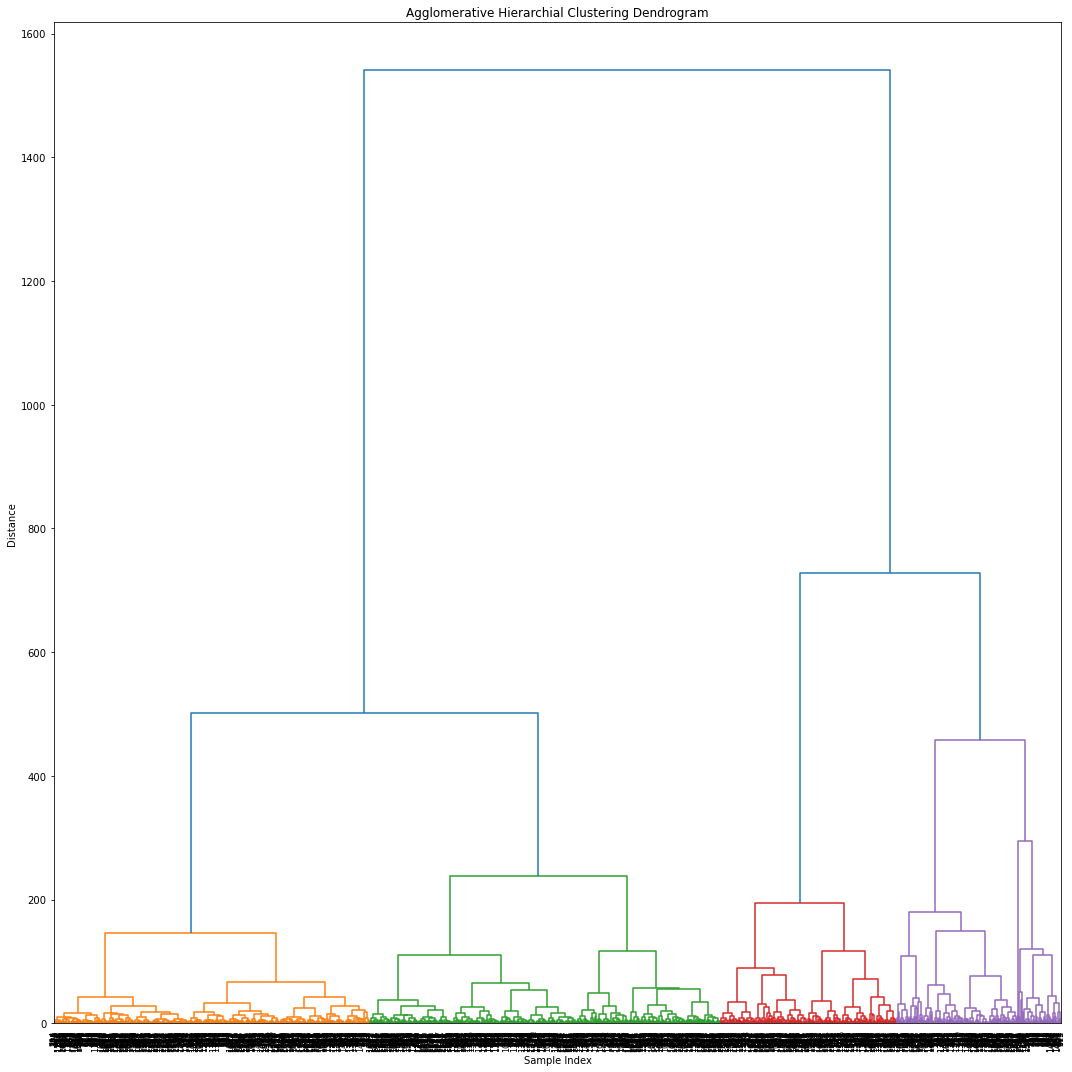

In [29]:
plt.figure(figsize=(15,15))
plt.title("Agglomerative Hierarchial Clustering Dendrogram")
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(z,leaf_rotation=90,color_threshold=480,leaf_font_size=8.)
plt.tight_layout()

#### Observation

even though Cophenet index is 66% but cluster looks balaced with threshold of 480 and giving much better dendrogram when compare to other linkage methods

we can do KMeans clustering based on this and it will be decided if we are able to identify right clusters meaningfully.